#📌 Extracão

In [2]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/emilesartori/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [13]:
customer_data = df['customer'].apply(pd.Series)
phone_data = df['phone'].apply(pd.Series)
internet_data = df['internet'].apply(pd.Series)
account_data = df['account'].apply(pd.Series)

# extraindo mes e total gasto
account_data['Charges.Monthly'] = account_data['Charges'].apply(lambda x: x.get('Monthly'))
account_data['Charges.Total'] = account_data['Charges'].apply(lambda x: x.get('Total'))
account_data = account_data.drop(columns=['Charges'])


extracted_df = pd.concat([df[['customerID', 'Churn']], customer_data, phone_data, internet_data, account_data], axis=1)

# mantendo apenas colunas usadas
df_final = extracted_df[['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']]

display(df_final.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
import numpy as np

# checando valores ausentes
print("Valores ausentes por coluna:")
print(df_final.isnull().sum())

#contando total de valores
print("\nTotal de linhas:")
print(len(df_final))

# Convertendo 'Charges.Total' para numero
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')



# procurando linhas duplicadas
print("\nNúmero de linhas duplicadas:")
print(df_final.duplicated().sum())

# checando tipos
print("\nTipo de dados por coluna:")
print(df_final.dtypes)

# Valores por categoria
print("\nValores únicos por categoria:")
for col in df_final.select_dtypes(include='object').columns:
    unique_values = df_final[col].unique()
    if len(unique_values) > 20:
        print(f"- {col}: {unique_values[:10]}...")
    else:
        print(f"- {col}: {unique_values}")


# trocando valores branco por nan - correção Churn
df_final['Churn'] = df_final['Churn'].replace('', np.nan)



# checando valores ausentes após tratamento Churn
print("Valores ausentes por coluna:")
print(df_final.isnull().sum())


Valores ausentes por coluna:
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64
Total de linhas:
7267

Número de linhas duplicadas:
0

Tipo de dados por coluna:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSuppo

In [17]:
#removendo valores nan
df_final.dropna(subset=['Churn', 'Charges.Total'], inplace=True)

print("Número de linhas após remover valores ausentes:")
print(len(df_final))


print("\nValores ausentes por coluna após remoção:")
print(df_final.isnull().sum())




Número de linhas após remover valores ausentes:
7032

Valores ausentes por coluna após remoção:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [23]:
#criando a coluna Contas_Diarias

df_final['Contas_Diarias'] = round(df_final['Charges.Monthly'] / 30,2)


display(df_final[['Charges.Monthly', 'Contas_Diarias']].head())

,Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [ ]:
#transformando valores
from sklearn.preprocessing import LabelEncoder

# Colunas para ajustar
categorical_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod']

df_encoded = df_final.copy()

# mapeando valores
for col in categorical_cols:
    if df_encoded[col].nunique() <= 2:
        # para colunas com dois valores
        mapping = {df_encoded[col].unique()[0]: 0, df_encoded[col].unique()[1]: 1}
        df_encoded[col] = df_encoded[col].map(mapping)
    else:
        # para colunas com mais de dois
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

#removendo coluna de ID
df_encoded = df_encoded.drop('customerID', axis=1)


display(df_encoded.head())


#📊 Carga e análise

In [29]:
# Descrevendo colunas
print("Colunas numéricas:")
display(df_encoded.describe())


print("\nTodas as colunas:")
display(df_encoded.describe(include='all'))

Colunas numéricas:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.517491,0.701507,32.421786,0.096701,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.407281,1.573237,64.798208,2283.300441,2.159891
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,1.002955
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,1.187500
50%,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,70.350000,1397.475000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,0.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.960000



Todas as colunas:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.517491,0.701507,32.421786,0.096701,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.407281,1.573237,64.798208,2283.300441,2.159891
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,1.002955
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,1.187500
50%,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,70.350000,1397.475000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,0.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.960000


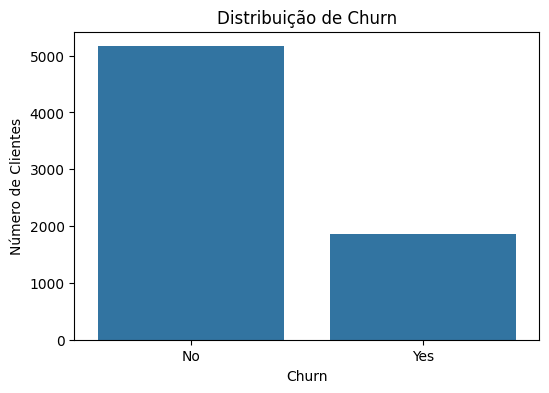

Contagem de clientes por categoria de Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# contagem valores
churn_counts = df_final['Churn'].value_counts()

# gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


print("Contagem de clientes por categoria de Churn:")
print(churn_counts)

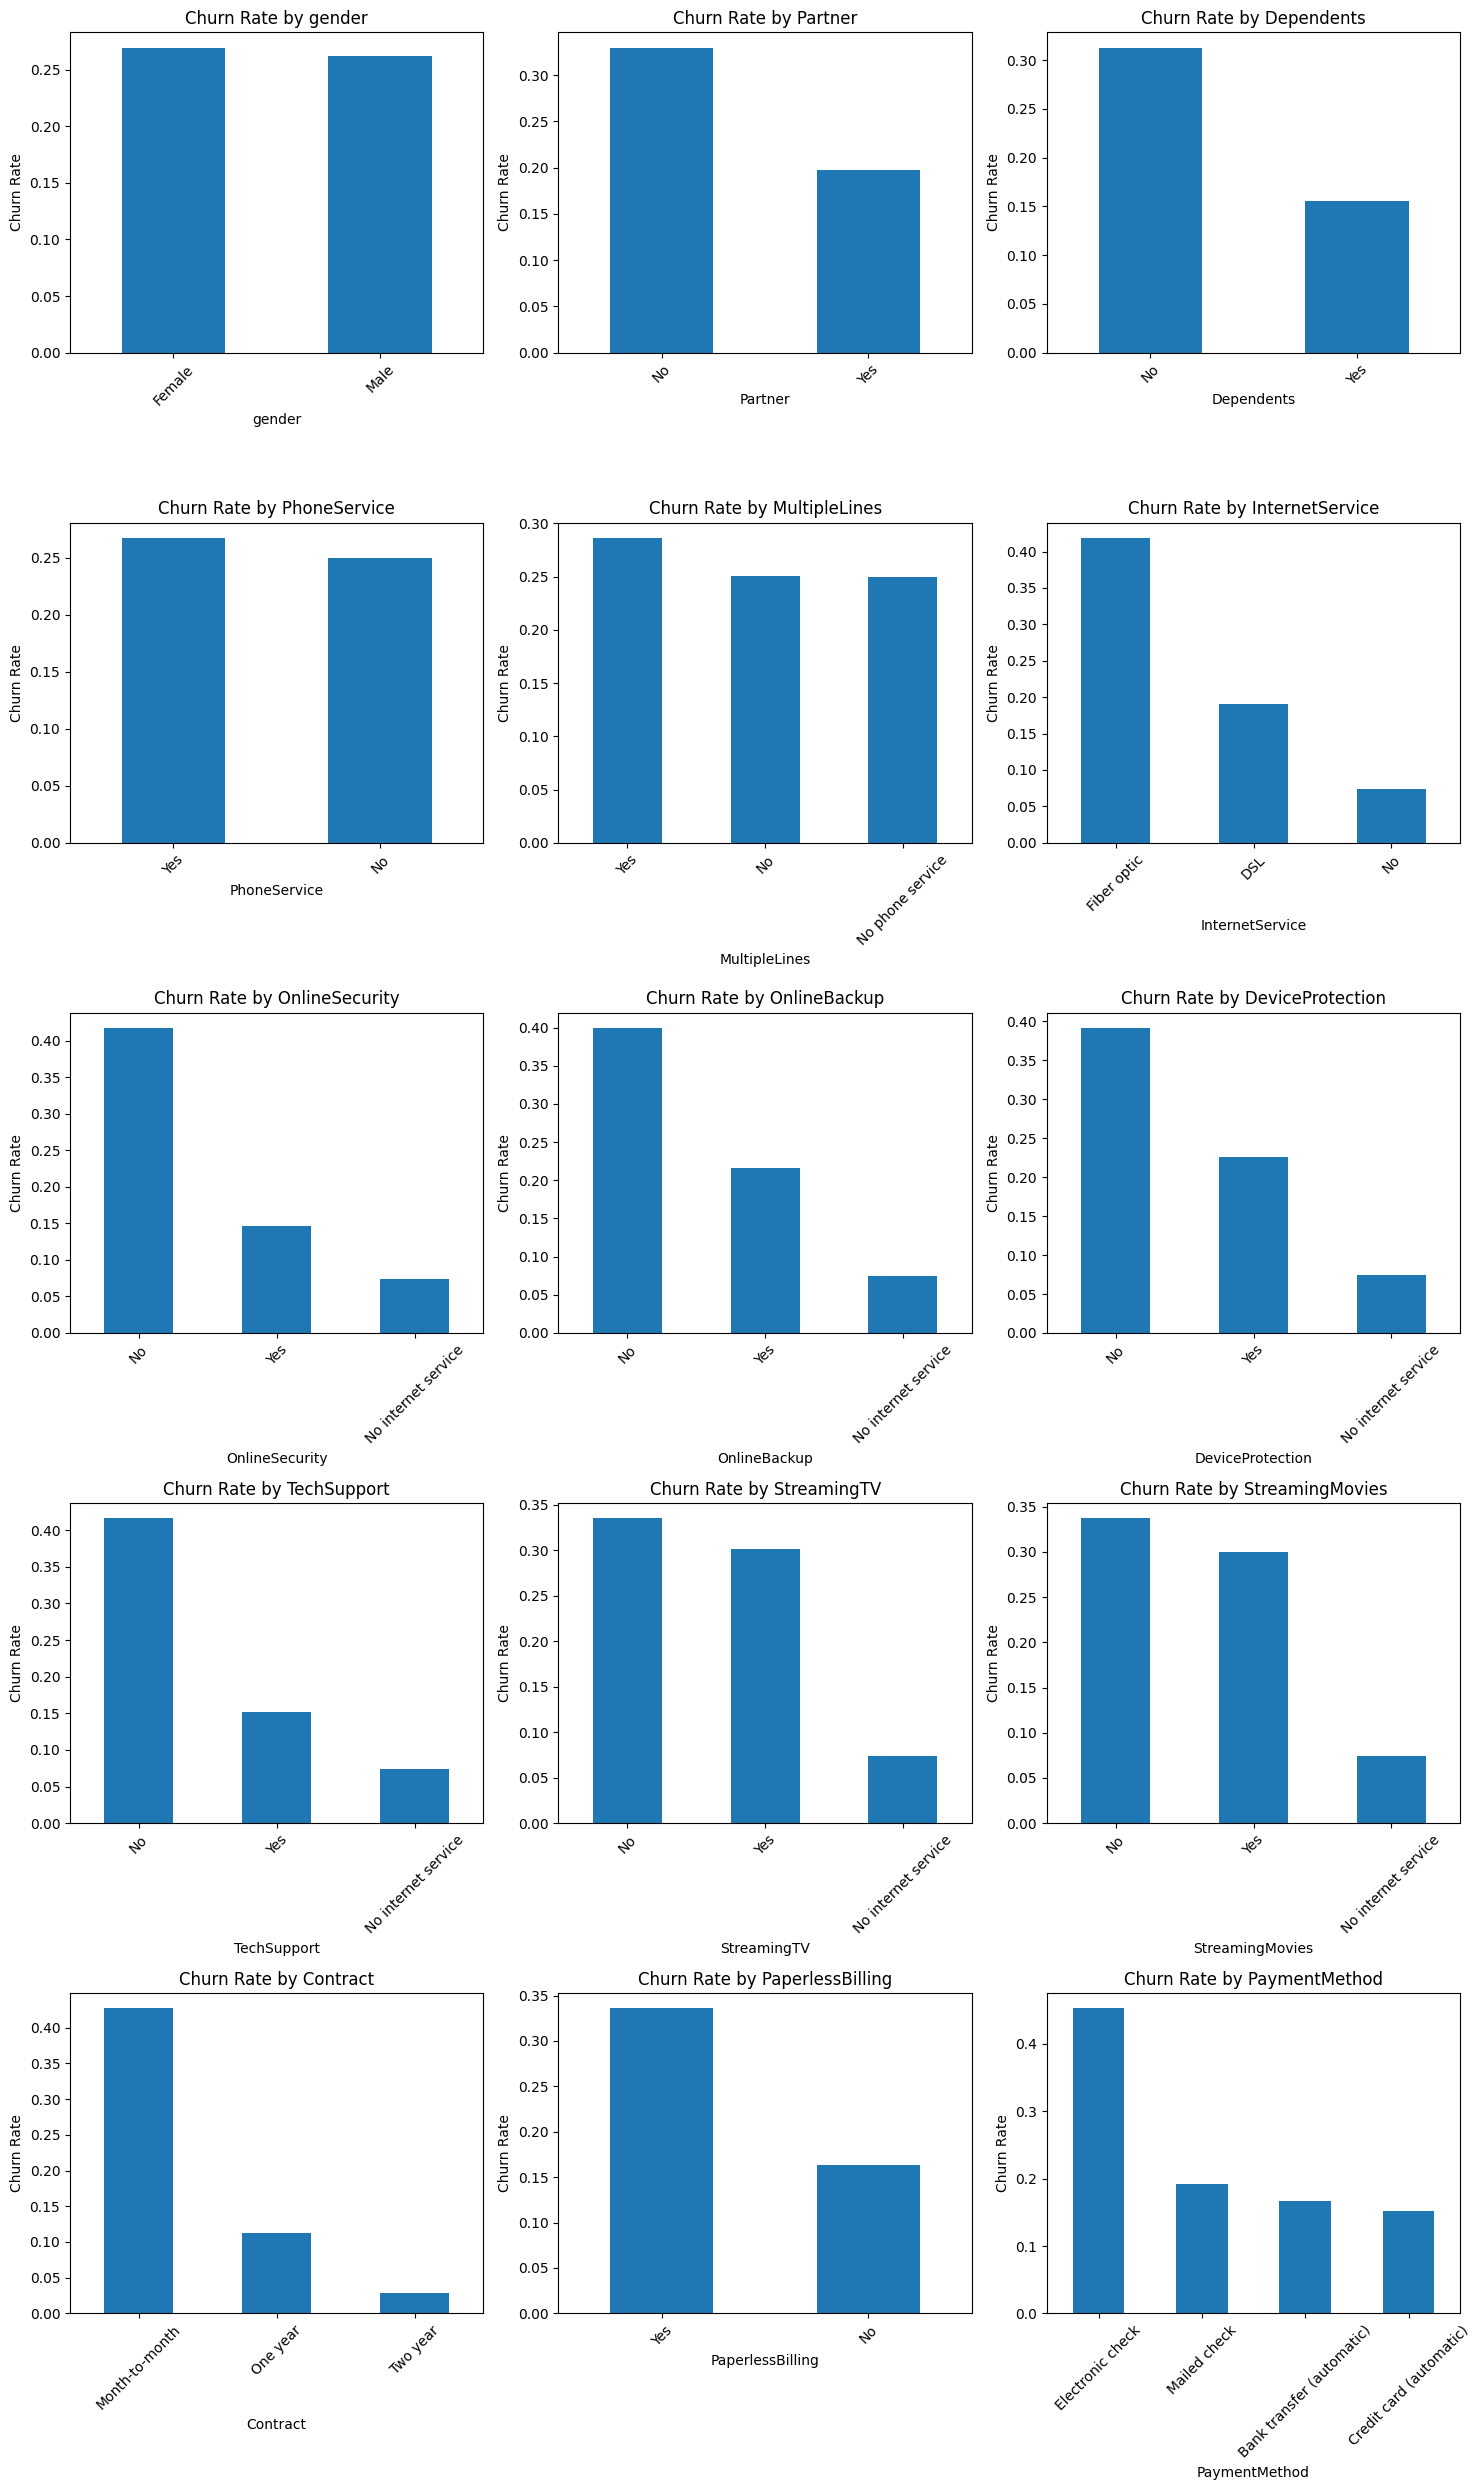

In [34]:
#Contagem de Evasão por Variáveis Categóricas

#colunas para filtrar
colunas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                               'PaperlessBilling', 'PaymentMethod']

# preparação para grafico
n_cols = 3
n_rows = (len(colunas_categoricas) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()


for i, col in enumerate(colunas_categoricas):
    if i < len(axes):
        churn_by_category = df_final.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
        churn_by_category['Yes'].sort_values(ascending=False).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Churn Rate by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Churn Rate')
        axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

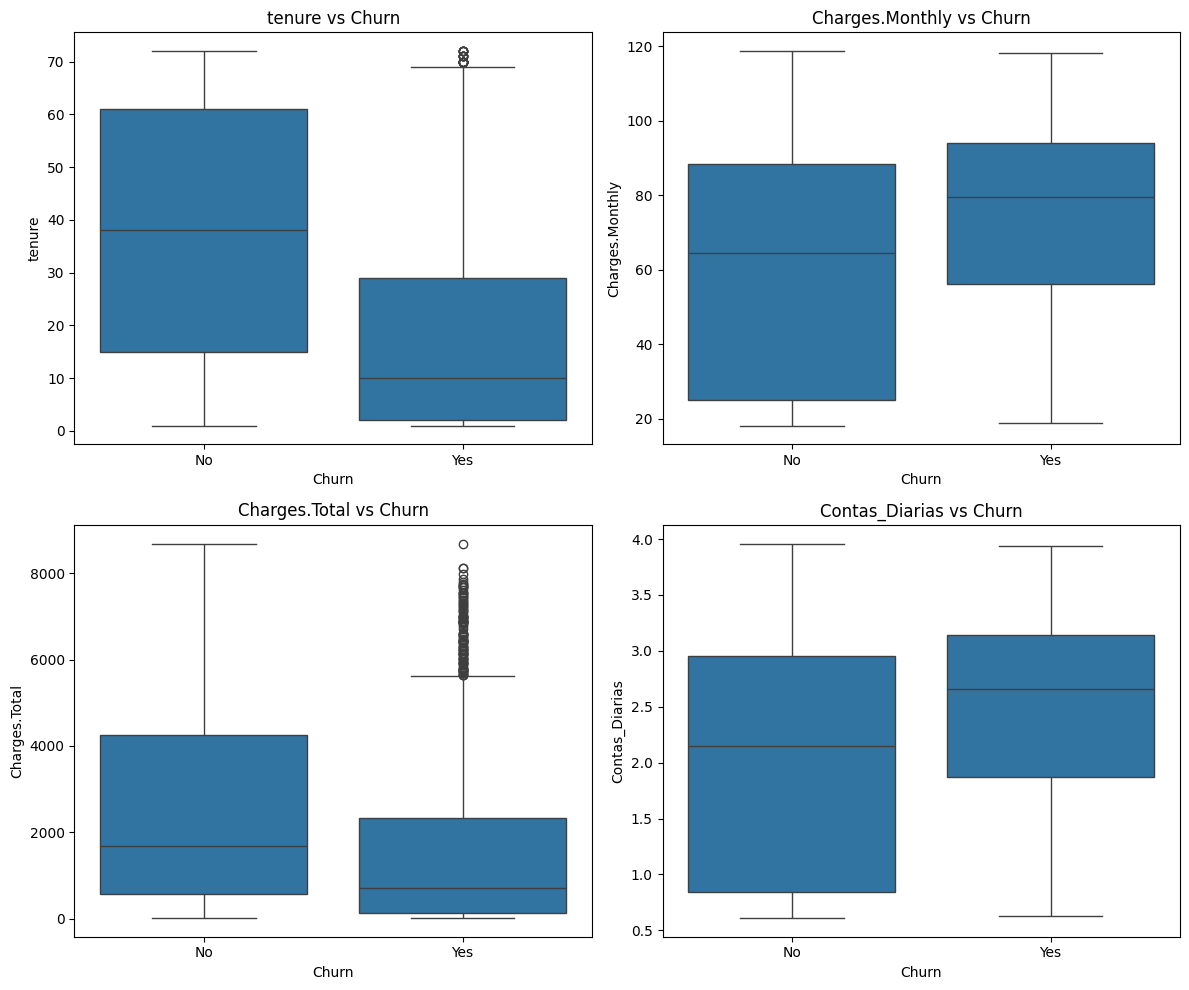

In [36]:
#Contagem de Evasão por Variáveis Numéricas

#colunas para filtrar
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

# preparação para grafico
n_cols = 2
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()


for i, col in enumerate(colunas_numericas):
    if i < len(axes):
        sns.boxplot(x='Churn', y=col, data=df_final, ax=axes[i])
        axes[i].set_title(f'{col} vs Churn')
        axes[i].set_xlabel('Churn')
        axes[i].set_ylabel(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#📄Relatorio Final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0,0,0,0,0,9,0,0,0,0,...,0,2,2,0,1,0,3,65.6,593.30,2.19
1,0,1,0,1,1,9,0,2,0,0,...,0,0,0,2,0,1,3,59.9,542.40,2.00
2,1,1,0,1,1,4,0,0,1,0,...,2,0,0,0,0,0,2,73.9,280.85,2.46
3,1,1,1,0,1,13,0,0,1,0,...,2,0,2,2,0,0,2,98.0,1237.85,3.27
4,1,0,1,0,1,3,0,0,1,0,...,0,2,2,0,0,0,3,83.9,267.40,2.80


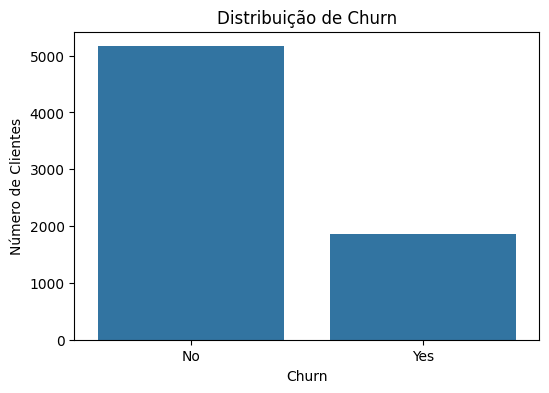

Contagem de clientes por categoria de Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


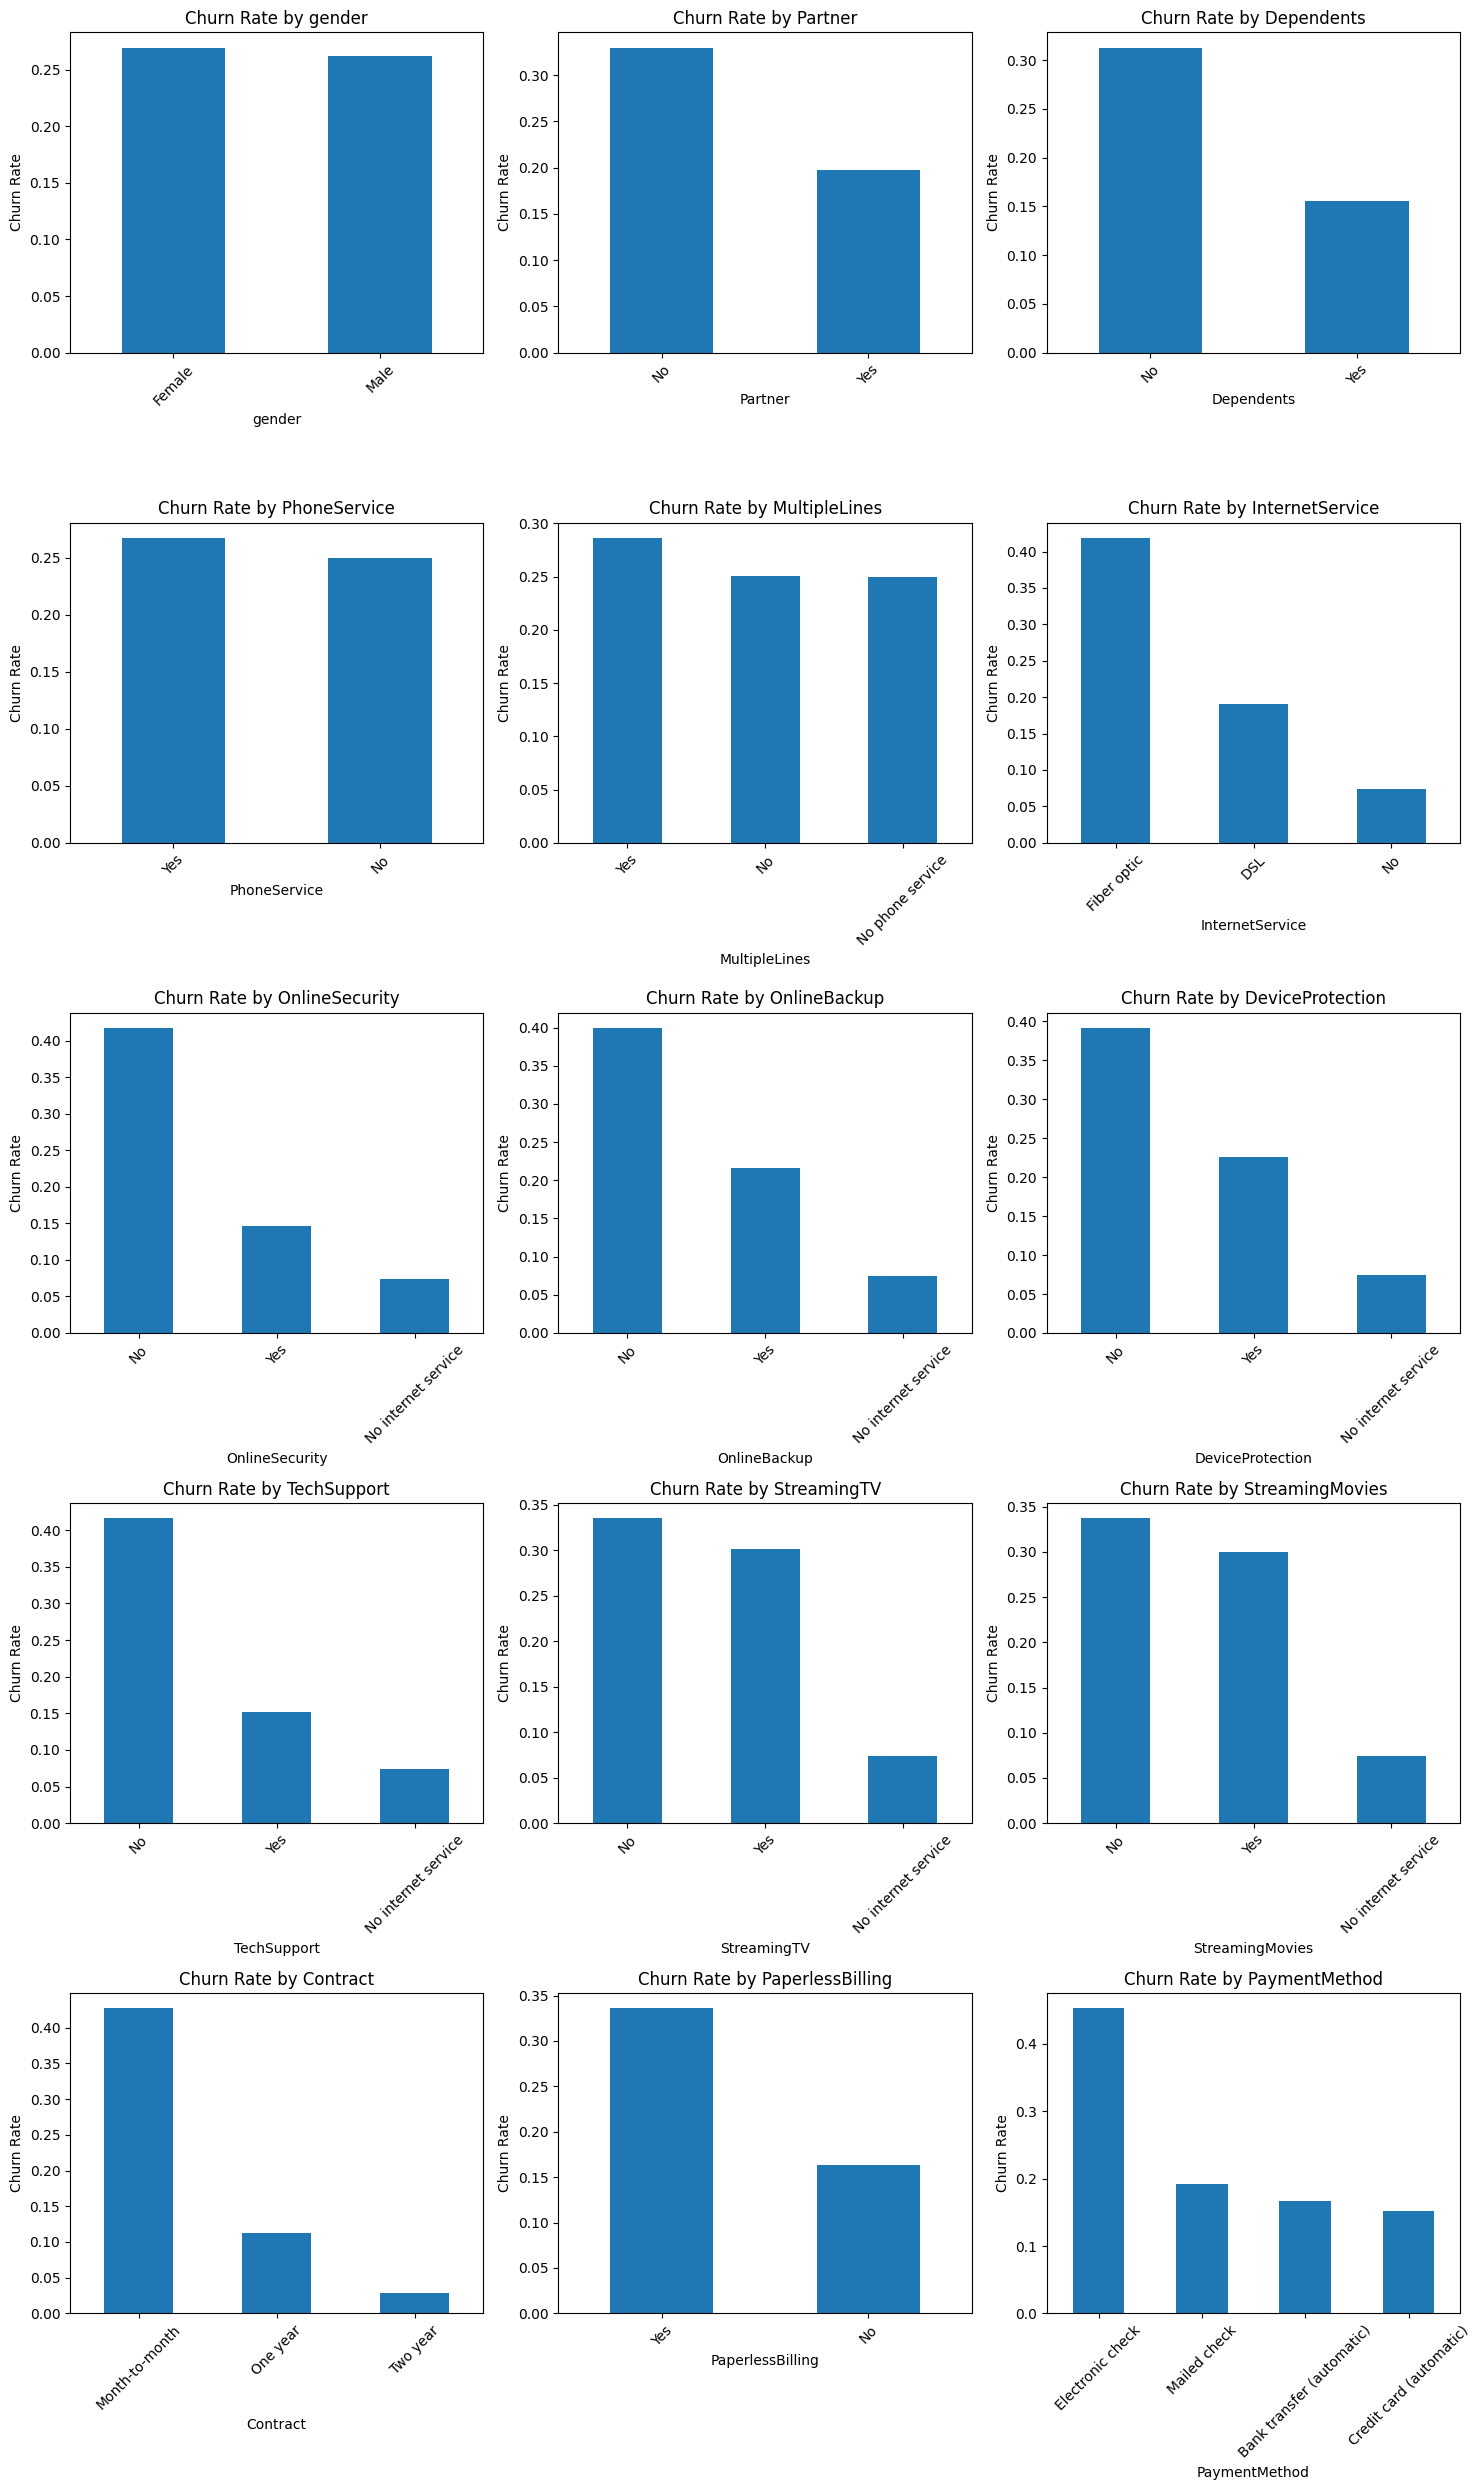

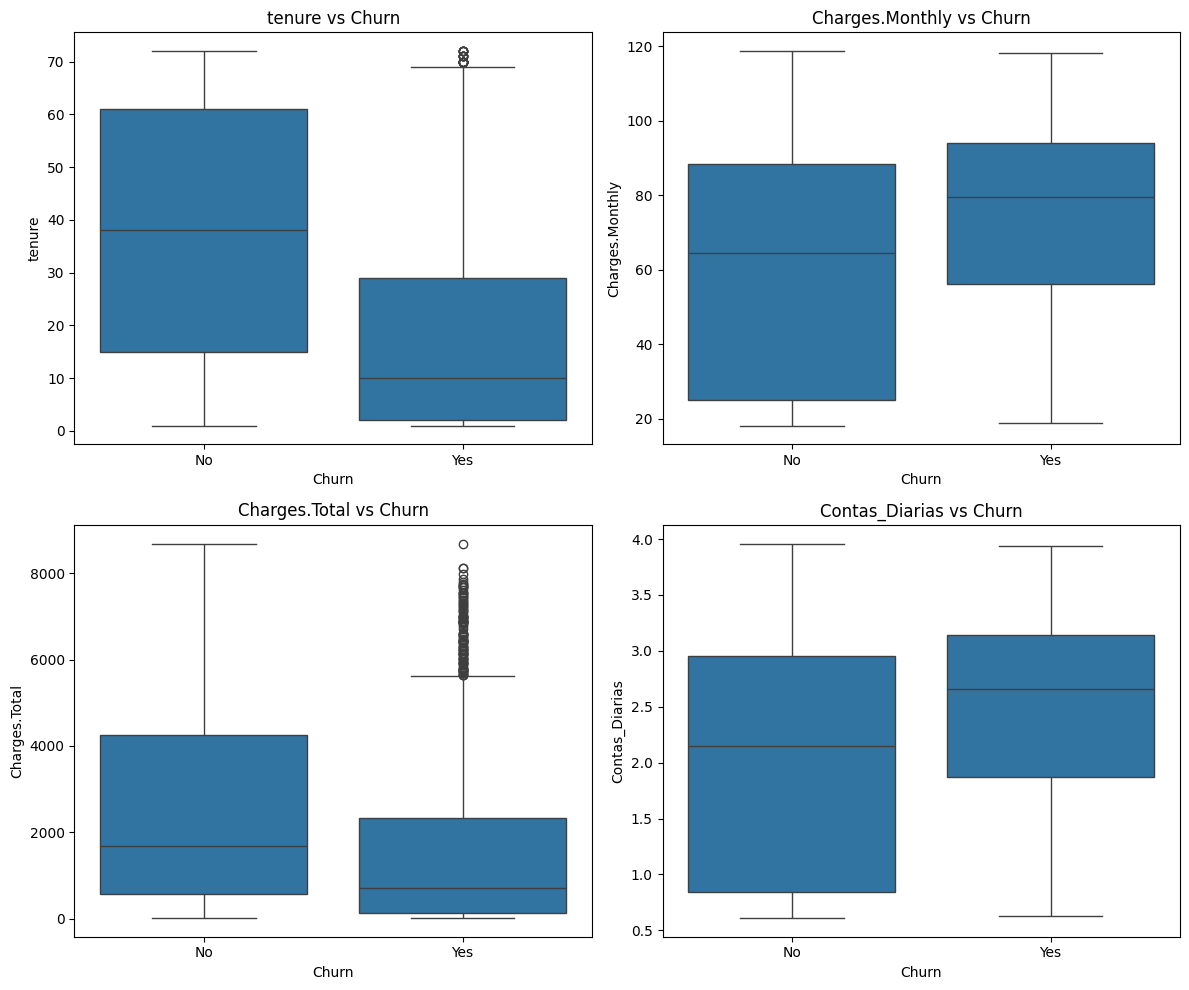